### Importing libraires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Loading the data

- Please, first donwload the data for the 2023 file.
- Uzip creditcard.gzip file for the data for 2013

In [6]:
url_creditcard_2023 = 'https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023'

In [3]:
df_2013 = pd.read_csv('creditcard.csv')
# df_2023 = pd.read_csv('creditcard_2023.csv')

### Exploring dataset shape

In [4]:
df_2013.shape, df_2023.shape

((284807, 31), (568630, 31))

### We will analysis the 2013 and will try the model on the 2023 to see if everything stays the same or there are chanhges on the amount and type of fraud commited

### Exploring shape of the dataset

In [5]:
df_2013.shape

(284807, 31)

In [6]:
df_2013.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
df_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df_2013.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Observaciones

- El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos. Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de un total de 284,807 transacciones. El conjunto de datos está altamente desequilibrado, ya que la clase positiva (fraudes) representa el 0.172% de todas las transacciones.

- Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no podemos proporcionar las características originales y más información de fondo sobre los datos. Las características V1, V2, ... V28 son los componentes principales obtenidos con PCA; las únicas características que no han sido transformadas con PCA son 'Time' y 'Amount'. La característica 'Time' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La característica 'Amount' es el monto de la transacción; esta característica puede usarse, por ejemplo, para el aprendizaje dependiente del costo. La característica 'Class' es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

- Dada la proporción de desequilibrio de clases, recomendamos medir la precisión utilizando el Área Bajo la Curva de Precisión y Recall (AUPRC). La precisión de la matriz de confusión no es significativa para la clasificación desequilibrada.

## EDA

In [9]:
df_2013.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
df_2013.Class.value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

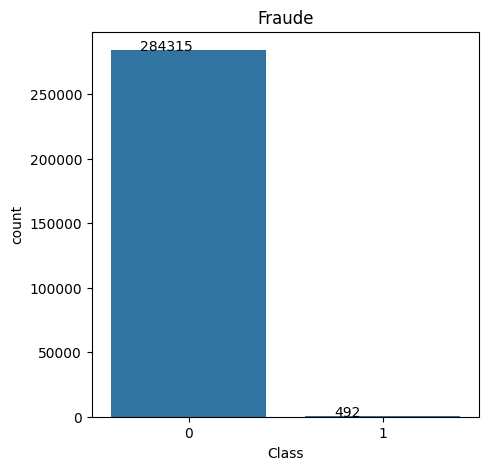

In [11]:
plt.figure(figsize=(5, 5))
plt.title('Fraude')

ax = sns.countplot(x='Class', data=df_2013)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))

plt.show()

In [12]:
df_2013.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [14]:
cor_value_by_columns = df_2013[cols].corrwith(df_2013.Class).to_frame('correlation')
cor_value_by_columns.sort_values('correlation')

,correlation
V17,-0.326481
V14,-0.302544
V12,-0.260593
V10,-0.216883
V16,-0.196539
V3,-0.192961
V7,-0.187257
V18,-0.111485
V1,-0.101347
V9,-0.097733


In [15]:
# correlation matrix
corr = df_2013.corr()
corr.style.background_gradient(cmap='summer_r')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


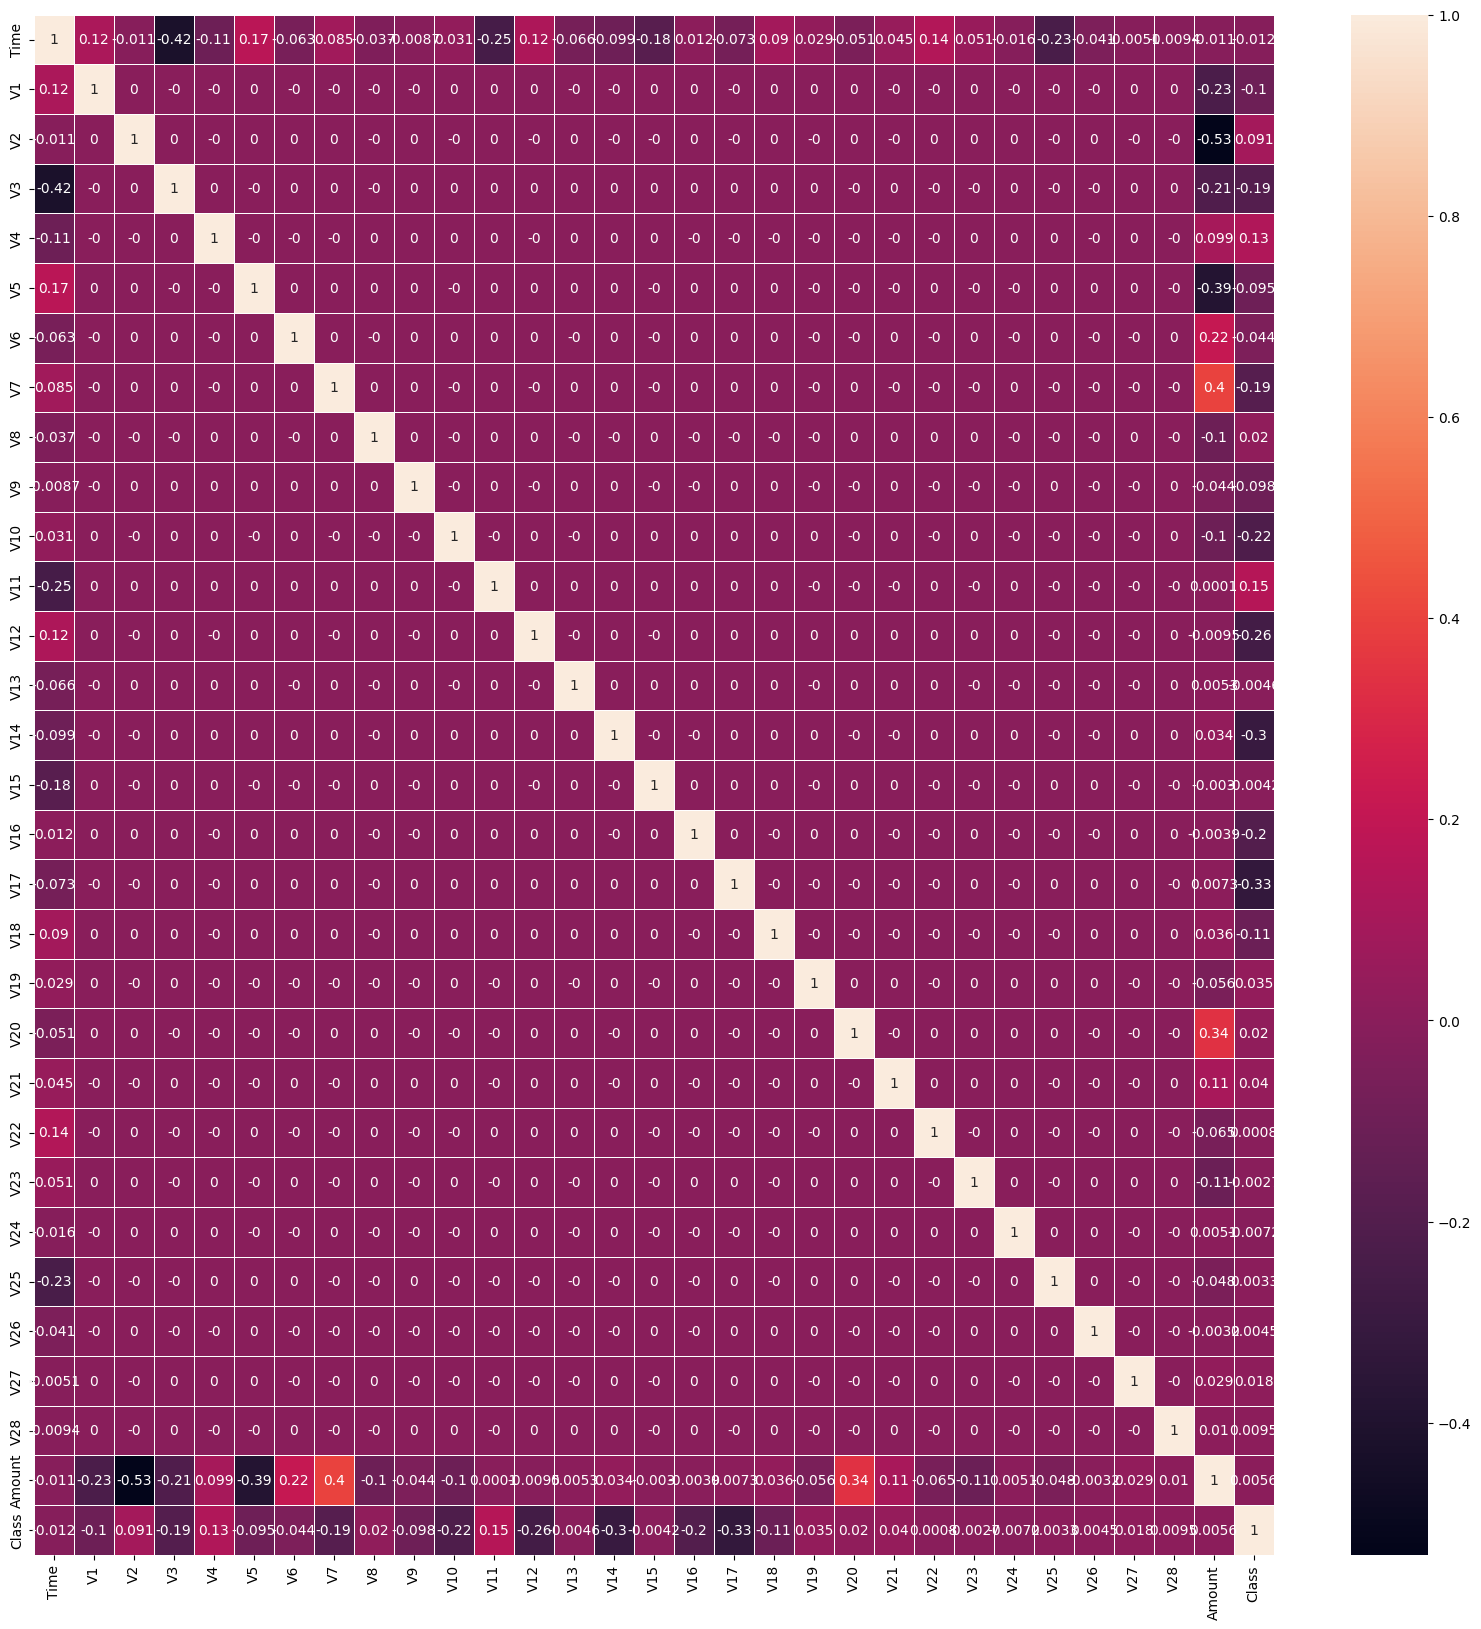

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(round(corr, 4), linewidths=0.5, annot=True);

In [17]:
# making Hour feature from Time feature
df_2013["Hour"] = df_2013["Time"].apply(lambda x: np.ceil(float(x)/3600) % 24)
df_2013["Hour"] = df_2013["Hour"].astype("int")

In [18]:
# Transaction count with non frauds over time(Hour)
count_not_fraud = df_2013[df_2013['Class']==0].groupby('Hour').count()["Class"]

# Transaction count with frauds over time(Hour)
count_fraud = df_2013[df_2013['Class']==1].groupby('Hour').count()["Class"]

# Concatenate
counts_df = pd.concat([count_not_fraud, count_fraud], axis=1, keys=["Not Fraud", "Fraud"])
df_counts = counts_df.reset_index()
df_counts

,Hour,Not Fraud,Fraud
0,0,10919,21
1,1,7687,6
2,2,4212,10
3,3,3269,57
4,4,3476,17
5,5,2185,23
6,6,2979,11
7,7,4093,9
8,8,7219,23
9,9,10266,9


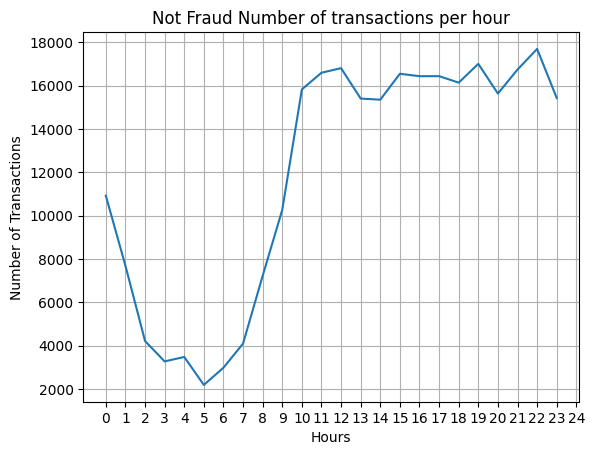

In [19]:
plt.plot(df_counts['Hour'], df_counts['Not Fraud']);
plt.title('Not Fraud Number of transactions per hour')
plt.xlabel('Hours')
plt.ylabel('Number of Transactions')
plt.grid()
plt.xticks(range(25));

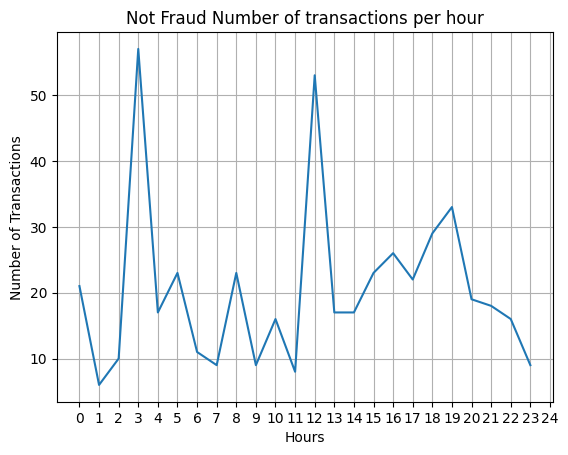

In [20]:
plt.plot(df_counts['Hour'], df_counts['Fraud']);
plt.title('Not Fraud Number of transactions per hour')
plt.xlabel('Hours')
plt.ylabel('Number of Transactions')
plt.grid()
plt.xticks(range(25));

### Importing libraries to make the models

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

### Spliting the data set

In [22]:
df_2013.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0


In [23]:
df_2013.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour'],
      dtype='object')

In [24]:
cols_for_models = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Hour']

In [25]:
X = df_2013.loc[: , cols_for_models]
y = df_2013.Class

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [27]:
# model building

lr=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
knn=KNeighborsClassifier()
svc=SVC(probability=True)
nb=GaussianNB()
xgb=XGBClassifier()

In [33]:
model_result = []

In [29]:
models = [lr, dtc, rfc, gbc, knn, svc, nb, xgb]

In [30]:
"""
[[True Negative  False Positive]
 [False Negative True Positive]]
"""

'\n[[True Negative  False Positive]\n [False Negative True Positive]]\n'

In [34]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)

    print(f'{type(model).__name__}, Confusion Matrix:')
    print(cm)
    print((cm / cm.sum()).round(8))

    """
    cm[0][0] = TN
    cm[1][1] = TP
    cm[0][1] = FP
    cm[1][0] = FN
    """
    # tpr = tp / (tp + fn)
    # fpr = fp / (fp + tn)
    tpr = cm[1][1] / (cm[1][1] + cm[1][0])
    fpr = cm[0][1] / (cm[0][1] + cm[0][0])
    
    model_result.append((
        type(model).__name__, 
        accuracy_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        mean_absolute_error(y_test, y_pred),
        np.sqrt(mean_squared_error(y_test, y_pred)),
        r2_score(y_test, y_pred),
        cm[0][0], cm[1][1], cm[0][1], cm[1][0],
        tpr, fpr
    ))
    
df_model_result = pd.DataFrame(model_result, columns=['Model','Accuracy', 'F1 Score', 'MAE', 'MASE', 'R2 Score',
                                                     'True Negative', 'True Positive', 'False Positive',
                                                     'False Negative', 'TPR', 'FPR'])

LogisticRegression, Confusion Matrix:
[[85269    14]
 [   63    97]]
[[9.9796355e-01 1.6385000e-04]
 [7.3733000e-04 1.1352600e-03]]
DecisionTreeClassifier, Confusion Matrix:
[[85251    32]
 [   37   123]]
[[9.9775289e-01 3.7452000e-04]
 [4.3304000e-04 1.4395600e-03]]
RandomForestClassifier, Confusion Matrix:
[[85277     6]
 [   34   126]]
[[9.9805718e-01 7.0220000e-05]
 [3.9793000e-04 1.4746700e-03]]
GradientBoostingClassifier, Confusion Matrix:
[[85255    28]
 [   47   113]]
[[9.977997e-01 3.277000e-04]
 [5.500700e-04 1.322520e-03]]
KNeighborsClassifier, Confusion Matrix:
[[85274     9]
 [   64    96]]
[[9.9802207e-01 1.0533000e-04]
 [7.4904000e-04 1.1235600e-03]]
SVC, Confusion Matrix:
[[85270    13]
 [  104    56]]
[[9.9797526e-01 1.5215000e-04]
 [1.2171900e-03 6.5541000e-04]]
GaussianNB, Confusion Matrix:
[[83454  1829]
 [   29   131]]
[[9.7672132e-01 2.1406080e-02]
 [3.3941000e-04 1.5331900e-03]]
XGBClassifier, Confusion Matrix:
[[85273    10]
 [   31   129]]
[[9.9801037e-01 1.170

In [35]:
df_model_result

,Model,Accuracy,F1 Score,MAE,MASE,R2 Score,True Negative,True Positive,False Positive,False Negative,TPR,FPR
0,LogisticRegression,0.999099,0.715867,0.000901,0.030020,0.517847,85269,97,14,63,0.60625,0.000164
1,DecisionTreeClassifier,0.999192,0.780952,0.000808,0.028418,0.567941,85251,123,32,37,0.76875,0.000375
2,RandomForestClassifier,0.999532,0.863014,0.000468,0.021637,0.749531,85277,126,6,34,0.78750,0.000070
3,GradientBoostingClassifier,0.999122,0.750831,0.000878,0.029627,0.530371,85255,113,28,47,0.70625,0.000328
4,KNeighborsClassifier,0.999146,0.724528,0.000854,0.029230,0.542894,85274,96,9,64,0.60000,0.000106
5,SVC,0.998631,0.489083,0.001369,0.037005,0.267378,85270,56,13,104,0.35000,0.000152
6,GaussianNB,0.978255,0.123585,0.021745,0.147464,-10.634286,83454,131,1829,29,0.81875,0.021446
7,XGBClassifier,0.999520,0.862876,0.000480,0.021906,0.743269,85273,129,10,31,0.80625,0.000117


In [36]:
results_all_models_df = pd.DataFrame({'Actual': y_test})

In [37]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results_all_models_df[f'{type(model).__name__}_Predictions'] = y_pred   

In [38]:
"""results_all_models_df[['Actual', 'RandomForestClassifier_Predictions']][(results_all_models_df.Actual == 1) & (results_all_models_df.RandomForestClassifier_Predictions == 0)].shape"""

"results_all_models_df[['Actual', 'RandomForestClassifier_Predictions']][(results_all_models_df.Actual == 1) & (results_all_models_df.RandomForestClassifier_Predictions == 0)].shape"

In [ ]:
!pip install imblearn

In [58]:
from imblearn.combine import SMOTEENN
from collections import Counter 
from imblearn.under_sampling import RandomUnderSampler


In [41]:
counter = Counter(y_train)

In [42]:
smeen = SMOTEENN()

In [43]:
X_train_sm, y_train_sm = smeen.fit_resample(X_train, y_train)

In [44]:
counter2 = Counter(y_train_sm)

In [45]:
counter, counter2

(Counter({0: 199032, 1: 332}), Counter({1: 199031, 0: 198175}))

In [52]:
param_grid = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10]
}

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [59]:
rus = RandomUnderSampler(random_state=42)

X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

In [61]:
counter3 = Counter(y_undersampled)
counter3

Counter({0: 332, 1: 332})

In [55]:

rfc = RandomForestClassifier()

In [62]:
# Running a ne model to find the best params
rfc_cv = GridSearchCV(rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [63]:
rfc_cv.fit(X_undersampled, y_undersampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [65]:
print(rfc_cv.best_estimator_)
print(rfc_cv.best_score_)

RandomForestClassifier(min_samples_split=5, n_estimators=50)
0.9412622465254044


In [66]:
rfc.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [67]:
confusion_matrix(y_test, rfc.predict(X_test))

array([[85262,    21],
       [   22,   138]])

In [68]:
import pickle

In [69]:
# Save to file in the current working directory
pkl_filename = "rfc_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfc, file)



In [70]:
# Load from file
with open("rfc_model.pkl", 'rb') as file:
    pickle_model = pickle.load(file)

In [71]:
confusion_matrix(y_test, pickle_model.predict(X_test))

array([[85262,    21],
       [   22,   138]])

In [82]:
feature_importance = pd.Series(data=pickle_model.feature_importances_, index=X_train.columns)

Text(0.5, 1.0, 'Feature of Importance')

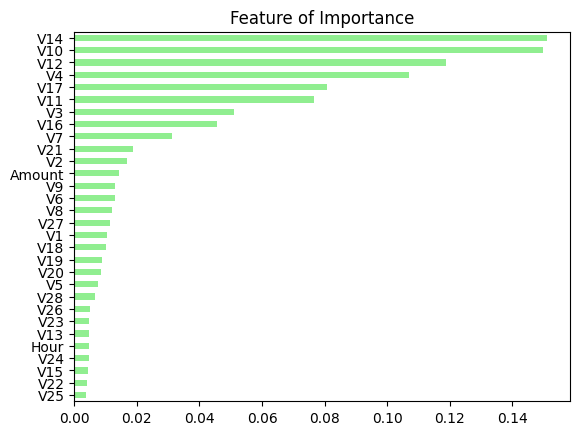

In [83]:
feature_importance.sort_values().plot(kind='barh', color='lightgreen');
plt.title('Feature of Importance')

In [101]:
df_2023.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [102]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

In [88]:
df_2023.drop(columns=['id'], inplace=True)

In [103]:
X_2023 = df_2023.iloc[: , :-1]
y_2023 = df_2023.Class

In [104]:
X_train_23, X_test_23, y_train_23, y_test_23 = train_test_split(X_2023, y_2023, test_size=0.3, random_state=123)

In [105]:
X_train_23.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
501286,-0.030976,0.104166,-0.394262,0.511108,0.347572,0.365069,0.243183,-0.018990,-0.186653,-0.302323,...,0.639729,-0.018386,-0.469951,0.378633,-0.280227,-0.333792,0.252411,0.308404,0.437586,16117.33
127237,0.499240,-0.843190,0.766426,-0.201203,0.109061,1.236157,0.303967,-0.082508,0.630411,0.567411,...,0.514101,0.076613,0.637566,-0.541091,-2.042182,0.525787,-0.416982,-0.199723,0.085874,12552.44
463763,-1.680848,1.331189,-1.515166,1.700834,-1.922900,-1.561520,-1.827296,2.060711,-2.280203,-1.858553,...,-0.902806,0.970602,0.574465,-0.536007,1.644785,0.479574,0.547540,-1.345823,-1.320617,6223.21
81129,-0.574461,-0.753705,-0.386659,-0.334834,-2.792912,5.583826,15.361456,-0.784955,0.088182,-0.248489,...,-3.731482,-0.604964,1.060196,-0.350249,1.199357,0.773904,-0.519295,3.569509,-4.006298,13362.46
274947,-0.100445,-0.110450,0.284101,0.458798,0.731948,0.373638,1.158417,-0.219435,-0.343401,1.538529,...,-1.026805,-0.030083,0.680752,0.116558,-0.001443,-0.555777,0.199605,-0.561399,-0.012005,2009.85


In [106]:
rfc_23 = RandomForestClassifier()

In [107]:
rfc_23.fit(X_train_23, y_train_23)

RandomForestClassifier()

In [108]:
confusion_matrix(y_test_23, rfc_23.predict(X_test_23))

array([[85116,    22],
       [    0, 85451]])

In [109]:
y_test_23.shape

(170589,)

In [110]:
# Save to file in the current working directory
pkl_filename = "rfc_model_23.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfc_23, file)


In [5]:
df_2013.to_csv('creditcard' + '.gzip', index=False, compression='gzip')
df_2023.to_csv('creditcard_2023' + '.bz2', index=False, compression='bz2')